<a href="https://colab.research.google.com/github/SeanManuelMartinezLopez/Data-Science/blob/main/Data_Analysis-05-25.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Analisis de Datos**

La siguiente base de datos corresponde al sistema médico de los Estados Unidos de America, el análisis corresponde a como se utilizó la clase 3 del Diplomado de Ciencia Matemática de Datos. 



---
Formato de la base de Datos:


1.   Edad
2.   Género
3.   IMC
4.   Fumador
5.   Región
6.   Hijos



---






Comenzamos cargando las librerias necesarias:

In [1]:
import pandas as pd
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime, date

Mostramos la base de datos:

In [2]:
pd.read_csv('/content/Test_Data.csv')

,age,sex,bmi,smoker,region,children
0,40,male,29.900000,no,southwest,2
1,47,male,32.300000,no,southwest,1
2,54,female,28.880000,no,northeast,2
3,37,male,30.568094,no,northeast,3
4,59,male,33.132854,yes,northeast,4
...,...,...,...,...,...,...
487,51,male,27.740000,no,northeast,1
488,33,male,42.400000,no,southwest,5
489,48,male,29.064615,no,northeast,4
490,42,female,24.260852,no,southeast,5


In [3]:
PLI = pd.read_csv('/content/Test_Data.csv')
PLI.head(10)

,age,sex,bmi,smoker,region,children
0,40,male,29.900000,no,southwest,2
1,47,male,32.300000,no,southwest,1
2,54,female,28.880000,no,northeast,2
3,37,male,30.568094,no,northeast,3
4,59,male,33.132854,yes,northeast,4
5,43,female,34.400000,no,southwest,3
6,50,female,25.852540,no,northwest,4
7,31,male,29.938928,no,northeast,5
8,19,female,31.299828,no,northwest,1
9,59,female,29.632240,no,southeast,3


In [4]:
PLI.shape

(492, 6)

In [5]:
#Para informacion de la base de datos
PLI.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 492 entries, 0 to 491
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       492 non-null    int64  
 1   sex       492 non-null    object 
 2   bmi       492 non-null    float64
 3   smoker    492 non-null    object 
 4   region    492 non-null    object 
 5   children  492 non-null    int64  
dtypes: float64(1), int64(2), object(3)
memory usage: 23.2+ KB


In [6]:
PLI.smoker.unique()

array(['no', 'yes'], dtype=object)

Podemos ver que en realidad solo hay dos respuestas posibles para si es fumador o no.

---

Seguimos con la descripcion del dataframe (columnas Numericas)

In [ ]:
PLI.describe()

,age,bmi,children
count,492.000000,492.000000,492.000000
mean,38.841463,30.682976,2.512195
std,12.417027,5.426067,1.684315
min,18.000000,16.815000,0.000000
25%,29.000000,26.991596,1.000000
50%,39.000000,29.979531,2.000000
75%,49.000000,33.776529,4.000000
max,64.000000,50.380000,5.000000


Para el tipo de región

In [ ]:
PLI['region'].unique()

array(['southwest', 'northeast', 'northwest', 'southeast'], dtype=object)

In [ ]:
PLI['region'].nunique()
#Cuantas regiones estamos considerando

4

Para ver cuantos hijos tienen, podemos usar lo siguiente:

In [ ]:
PLI.children.unique()

array([2, 1, 3, 4, 5, 0])

In [ ]:
#De la encuesta, cuales son los numeros de hijos que tenemos:
PLI.children.nunique()

6

In [ ]:
pd.DataFrame(PLI.groupby(['sex'])['children'].nunique())
#Cuantos hijos tienen (en cantidades diferentes) por genero

,children
sex,
female,6
male,6


In [16]:
df1 = pd.DataFrame(PLI.value_counts('age')).rename(columns = {0: 'bmi'}).reset_index()
df1
#Aqui agrupamos Anos con IMC

,age,bmi
0,32,19
1,19,19
2,48,19
3,43,18
4,52,18
5,39,16
6,26,16
7,30,15
8,50,14
9,40,13


In [ ]:
PLI.describe()

,age,bmi,children
count,492.000000,492.000000,492.000000
mean,38.841463,30.682976,2.512195
std,12.417027,5.426067,1.684315
min,18.000000,16.815000,0.000000
25%,29.000000,26.991596,1.000000
50%,39.000000,29.979531,2.000000
75%,49.000000,33.776529,4.000000
max,64.000000,50.380000,5.000000


In [7]:
PLI2 = PLI[['age', 'sex', 'smoker', 'region']]
PLI2

,age,sex,smoker,region
0,40,male,no,southwest
1,47,male,no,southwest
2,54,female,no,northeast
3,37,male,no,northeast
4,59,male,yes,northeast
...,...,...,...,...
487,51,male,no,northeast
488,33,male,no,southwest
489,48,male,no,northeast
490,42,female,no,southeast


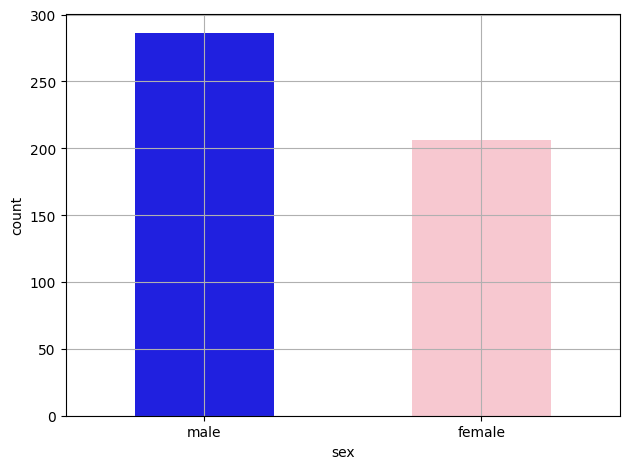

In [14]:
#Grafica de Insurance per Gender
p=sns.countplot(

 x='sex',
    data=PLI2,
    order=PLI2['sex'].value_counts().index,
    palette=["blue", "pink"], 
    width=0.5
)
In_Age.set(title="Insurance per Gender")
In_Age.set(xlabel = 'Gender')
In_Age.set(ylabel = 'People')
plt.tight_layout()
plt.grid(True)
plt.show()

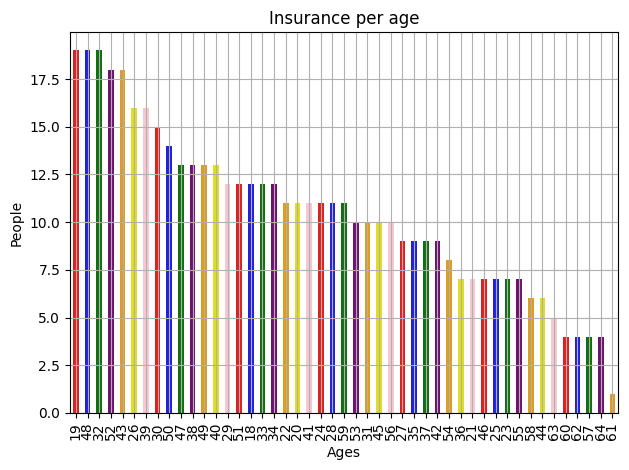

In [15]:
In_Age = sns.countplot(
    x='age',
    data=PLI2,
    order=PLI2['age'].value_counts().index,
    palette=["red", "blue", "green", "purple", "orange", "yellow", "pink"], 
    width=0.5
)
In_Age.set(title="Insurance per age")
In_Age.set(xlabel = 'Ages')
In_Age.set(ylabel = 'People')
plt.xticks(rotation=90)
plt.tight_layout()
plt.grid(True)
plt.show()

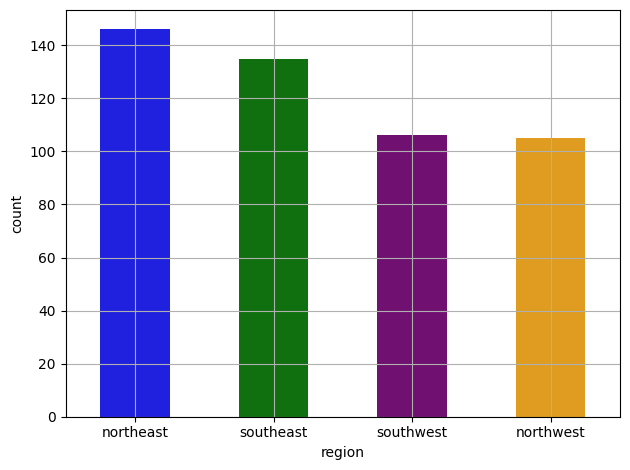

In [18]:
In_Reg = sns.countplot(
    x='region',
    data=PLI2,
    order=PLI2['region'].value_counts().index,
    palette=["blue", "green", "purple", "orange"], 
    width=0.5
)
In_Age.set(title="Insurance per Region")
In_Age.set(xlabel = 'Region')
plt.xticks()
plt.tight_layout()
plt.grid(True)
plt.show()